In [1]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [2]:
X = np.array([[2,3],[3,5],[1,2],[3,4],[7,9],[3,6]])

In [10]:
clusters = AgglomerativeClustering()
clusters.fit(X)

AgglomerativeClustering()

In [9]:
clusters.labels_

array([0, 2, 0, 2, 3, 1])

In [11]:
# Divisive

In [12]:
from scipy.cluster.hierarchy import linkage

In [13]:
L = linkage(X, method='ward')

In [14]:
L

array([[1.        , 3.        , 1.        , 2.        ],
       [0.        , 2.        , 1.41421356, 2.        ],
       [5.        , 6.        , 1.73205081, 3.        ],
       [7.        , 8.        , 4.51663592, 5.        ],
       [4.        , 9.        , 8.77116488, 6.        ]])

In [15]:
from scipy.cluster.hierarchy import dendrogram

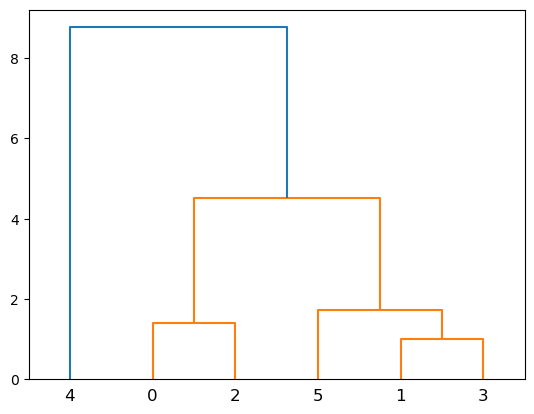

In [16]:
dn = dendrogram(L)

In [17]:
# Test with real data

In [18]:
import pandas as pd

In [35]:
loan_data = pd.read_csv("loan.csv")

In [36]:
loan_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [37]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [38]:
loan_data.isna().count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [39]:
loan_data.dropna(inplace=True)

In [40]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [41]:
loan_data.drop(['ZIP Code','ID'], axis=1, inplace=True)

In [42]:
loan_data.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [43]:
import seaborn as sns
import matplotlib as plt

In [46]:
def boxplot(X):
    plt.rcParams['figure.figsize'] = [15,6]
    sns.boxplot(data = X, orient='v')

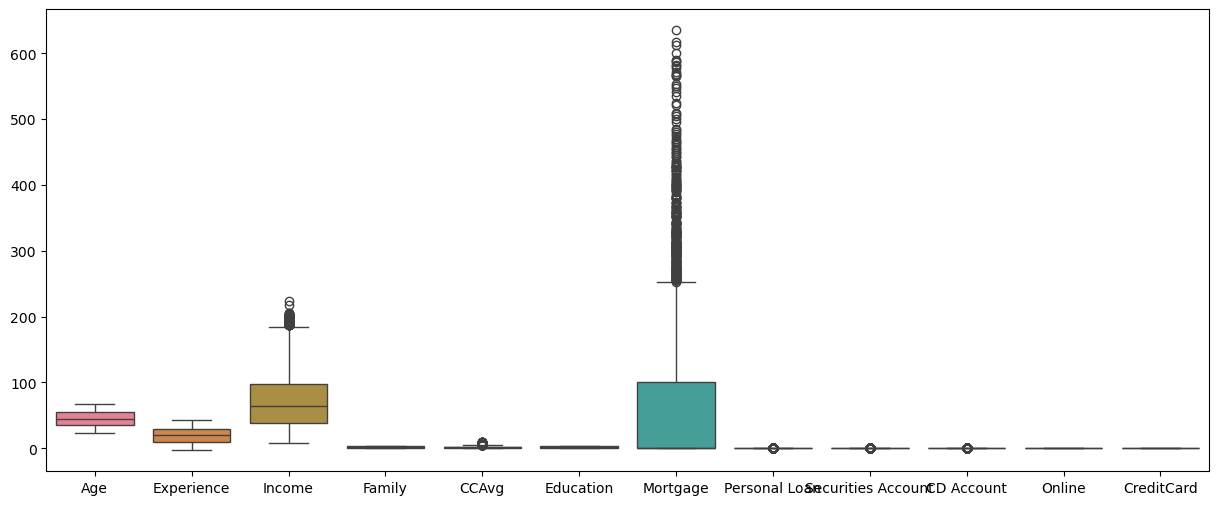

In [47]:
boxplot(loan_data)

In [48]:
# Apply Standard Scaler

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
loan_data_normalzied = scaler.fit_transform(loan_data)

In [55]:
loan_data_normalzied[0:5,1]

array([-1.66607847, -0.09633022, -0.44516316, -0.96841258, -1.05562082])

In [56]:
model = linkage(loan_data_normalzied, method='ward')

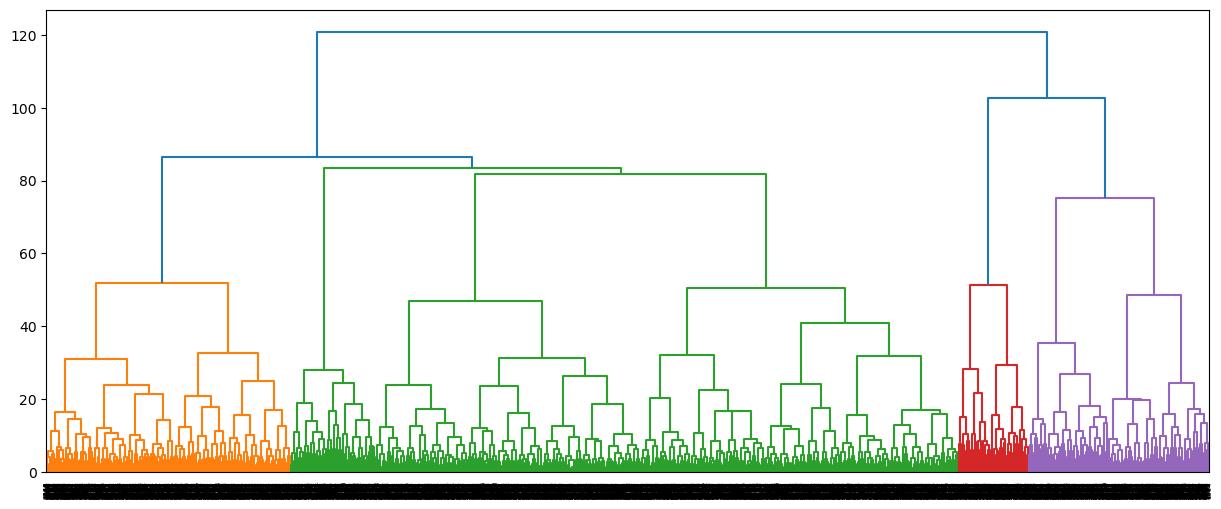

In [57]:
dn = dendrogram(model)

In [58]:
model = linkage(loan_data_normalzied, method='single')

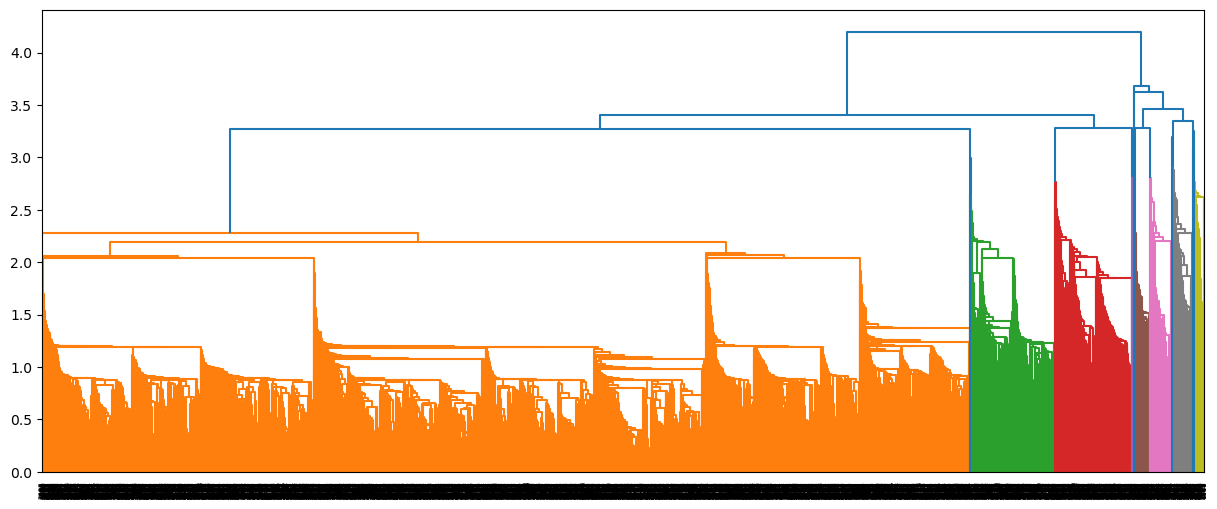

In [59]:
dn = dendrogram(model)